In [1]:
#fake event logs
import os,binascii
import random
l=[]
Class_of_event=['1','2','3','4','5','6','7','8','9','A','b','c','d','e','f']
type_of_event=['1','2','3','4','5','6','7','8','9','A','b','c','d','e','f']

events = random.choices(population=Class_of_event, k=512)
specific_events =random.choices(population=type_of_event, k=512)
operations=["{}{}".format(b_, a_) for a_, b_ in zip(events, specific_events)]
for i in range(512):
    l.append (binascii.b2a_hex(os.urandom(7)))
l.sort()

In [208]:
def initialise_list_of_events(config_file):
    import json
    with open(config_file) as f:
        return (json.load(f))

In [209]:
list_of_classes=initialise_list_of_events('events.json')
#events.json in the config file

In [210]:
class Event:
    def __init__(self, 
                class_of_operation, operation, t, data):
        self.c = class_of_operation
        self.o= operation
        self.t = t
        self.data= data

In [211]:
def extract_data(file_path):
    import struct
    from pathlib import Path
    size_of_file= Path(file_path).stat().st_size
    with open(file_path, 'rb') as file:
        c=file.read()
    liste=[]
    i=0
    t0= struct.unpack('B', b'\x00')[0]


    while (i<size_of_file):
        data=''
        
        b1= struct.unpack('B',c[i:i+1])[0] 
                      
        t2= struct.unpack('>B', c[i+1:i+2])[0]
        t3= struct.unpack('>B', c[i+2:i+3])[0]
        t4= struct.unpack('>B', c[i+3:i+4])[0]
        t5= struct.unpack('>B', c[i+4:i+5])[0]
        t6= struct.unpack('>B', c[i+5:i+6])[0]
        t7= struct.unpack('>B', c[i+6:i+7])[0]  
        t8= struct.unpack('>B', c[i+7:i+8])[0]
        timestamp= struct.unpack('>Q', struct.pack('>8B', t0 , t2, t3 , t4 , t5 , t6 , t7 , t8))[0]
        i+=8
        
        if (b1//16==6):   #  (to deal with the debugging event)
            data_bytes = int(list_of_classes['6']['operations'][str(b1%16)]['data-width']/8)  #number of bytes to consider
            if data_bytes==4:
                data= struct.unpack('>L', c[i:i+4])[0]
                i+=4
            elif data_bytes==8:
                data= struct.unpack('>Q', c[i:i+8])[0]
                i+=8
            
        
        liste.append(Event(b1//16, b1%16 ,timestamp,data))
    
    return(liste)
    

In [213]:
for i in (extract_data('event_stream1.bin')):
    print(i.c ,'//', i.o , '//', i.t ,'//',i.data, '\n')
    print('**************** \n')


6 // 0 // 4822678189205026 // 2 

**************** 

1 // 1 // 4822678189205060 //  

**************** 

6 // 1 // 4822678189205094 // 257 

**************** 

3 // 2 // 4822678189205128 //  

**************** 



In [197]:
x=extract_data('event_stream1.bin')
x[0].t

5029386375226914

In [168]:
def research_of_a_specific_class(x):
    wanted_type_of_operation=[]
    l=extract_data()
    for i in l:
        if i.c == x:
            wanted_type_of_operation.append(i)
           # print('RTC packet number' , len(RTC_packet_list) , 'took',  i.t, 'ns')
    return(wanted_type_of_operation)

In [169]:
def percentage_of_class(x):
    l=extract_data()
    return( round(len(research_of_a_specific_class(x)) / len(l) ,3))

In [170]:
percentage_of_class(6)

0.5

In [171]:
def type_of_operation(E):
    list_of_classs=initialise_list_of_events()
    if E.c in (list_of_classes['main_classes']):
        classs=list_of_classes[str(E.c)]['designation']
        typee= list_of_classes[str(E.c)]['operations'][str(E.o)]['designation']
    
    elif (E.c in ['a','b','c','d','e','f']):
        classs= 'costumised operations'
        
    else:
        print("indefined type of event")    
        
    print(classs,typee)
        
    

In [172]:
type_of_operation(l[0])

Debugging events event 0


In [173]:
list_of_classes['6']['operations']['0']['data-width']

32

In [174]:
list_of_classes[str(l[0].c)]['operations'][str(l[0].o)]['designation']



'event 0'

In [175]:
def pie_appearancee_of_operations():
    import matplotlib.pyplot as plt
    list_of_classs=initialise_list_of_events()
    
    classs=[]
    p=[]
    
    for i in list_of_classs['main_classes']:
        classs.append(list_of_classs[str(i)]['designation'] )
        p.append(percentage_of_class(i))
    classs.append("costumer events")
    p.append(1 - sum (p))
    #y = np.array(p)
    plt.figure(figsize=(20 , 10))
    plt.pie(p, labels = classs,pctdistance = 0.7, autopct = lambda p: str(round(p,2)) + '%',)
    plt.legend(loc="upper right", title= "Classes of events", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show() 
    return (p)   

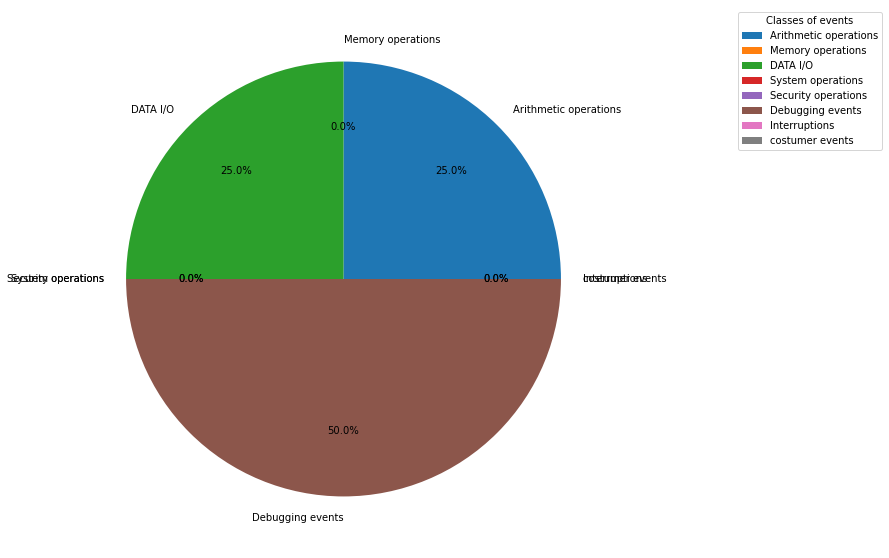

[0.25, 0.0, 0.25, 0.0, 0.0, 0.5, 0.0, 0.0]

In [176]:
pie_appearancee_of_operations()

In [227]:
def visualize_timestamps_of_operations(file_path):
    l=extract_data(file_path)

    import matplotlib.pyplot as plt
    list_of_classes=initialise_list_of_events()
    plt.figure(figsize=(20 , 10))


    for i in range(len(l)) :
        
        plt.plot(i+1, l[i].t, marker = 'o', color=list_of_classes[str(l[i].c)]['color'])
    plt.ylabel("t")
    plt.ylim([4822678189205000 , 4822678189205400 ])

    plt.xlabel("Number of operation")
    plt.grid()
    plt.savefig('visualize_timestamps_of_operations.png')
    plt.show()


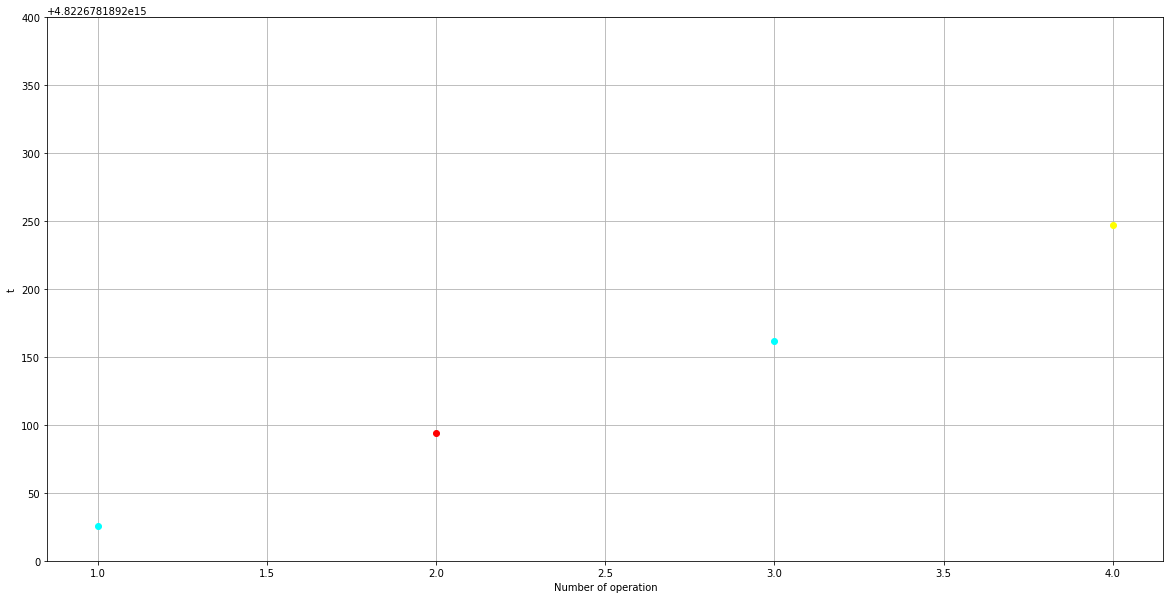

In [228]:
visualize_timestamps_of_operations('event_stream1.bin')